**Insurance Claim Status Prediction**

Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyse the data. As a Data scientist in an insurance company, you need to analyse the available data and predict whether to approve the insurance or not.

**Prepaird By**

**Humera**

**Nitish**

**Akshay**

**Abhijeet** 

**Importing Library**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score ,roc_curve
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv("/content/data.csv")

In [ ]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [ ]:
df.shape

(50553, 12)

**EDA**

In [ ]:
# Checking the weightage of null values.
(df['Gender'].isnull().sum()/df.shape[0]*100).round(2)

71.12

**we can see 71% of the data does not have Gender updated.  there are no other features that will help us find out whether the individual is male or female. Thus we will drop this feature**

**We can see from data ID column is not usefull data.hnce we will drop ID column**

In [ ]:
df.drop(["Gender"],axis=1,inplace=True)

In [ ]:
df.drop(["ID"],axis=1,inplace=True)

In [ ]:
df.describe()

,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,0.014658,49.425969,40.800977,9.83809,40.011236
std,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,0.000000,9.000000,18.000000,0.00000,35.000000
50%,0.000000,22.000000,26.500000,0.00000,36.000000
75%,0.000000,53.000000,48.000000,11.55000,44.000000
max,1.000000,4881.000000,810.000000,283.50000,118.000000


**Duration is negative so checking destination for rplace negative value**

In [ ]:
df[(df["Duration"]<0) & (df["Destination"])]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
4063,JZI,Airlines,Online,Basic Plan,0,-1,BRUNEI DARUSSALAM,18.0,6.3,118
38935,JZI,Airlines,Online,Basic Plan,0,-1,INDONESIA,18.0,6.3,118
48367,JZI,Airlines,Online,Basic Plan,0,-2,BANGLADESH,22.0,7.7,118


In [ ]:
#BANGLADESH,INDONESIA,BRUNEI DARUSSALAM has negaitive values
#replacing this negative value with mean value of its own

In [ ]:
ban=df[(df["Duration"]) & (df["Destination"]=="BANGLADESH")]
ban["Duration"].mean()

15.958333333333334

In [ ]:
indo=df[(df["Duration"]) & (df["Destination"]=="INDONESIA")]
indo["Duration"].mean()

31.335203366058906

In [ ]:
BRUNEI=df[(df["Duration"]) & (df["Destination"]=="BRUNEI DARUSSALAM")]
BRUNEI["Duration"].mean()

22.37012987012987

In [ ]:
des=df[(df["Duration"]==0) & (df["Destination"])]
des

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
181,JWT,Airlines,Online,Value Plan,0,0,INDIA,31.00,12.40,118
314,RAB,Airlines,Online,Value Plan,0,0,BRUNEI DARUSSALAM,15.00,6.00,53
1864,JWT,Airlines,Online,Value Plan,0,0,INDIA,31.00,12.40,118
3068,C2B,Airlines,Online,Silver Plan,0,0,SINGAPORE,0.00,5.63,51
4282,LWC,Travel Agency,Online,Single Trip Travel Protect Gold,0,0,MALAYSIA,27.00,17.55,56
7324,RAB,Airlines,Online,Value Plan,0,0,BRUNEI DARUSSALAM,15.00,6.00,24
7482,JZI,Airlines,Online,Basic Plan,0,0,THAILAND,18.00,6.30,118
7885,JZI,Airlines,Online,Basic Plan,0,0,THAILAND,18.00,6.30,118
8205,JWT,Airlines,Online,Value Plan,0,0,INDIA,62.00,24.80,118
8512,JWT,Airlines,Online,Value Plan,0,0,INDIA,31.00,12.40,118


In [ ]:
des["Destination"].mode()

0    INDIA
dtype: object

In [ ]:
ind=df[(df["Duration"]) & (df["Destination"]=="INDIA")]
ind["Duration"].mean()

30.41387024608501

In [ ]:
#duration has negative value
for i in range(len(df)):
    if df['Duration'][i]<0:
        print(df['Duration'].iloc[i])
        

-1
-1
-2


In [ ]:
df[df["Age"] >100]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
90,JWT,Airlines,Online,Value Plan,0,58,INDIA,78.0,31.20,118
108,JWT,Airlines,Online,Value Plan,0,15,INDIA,31.0,12.40,118
140,JWT,Airlines,Online,Value Plan,0,8,INDIA,39.0,15.60,118
153,JWT,Airlines,Online,Value Plan,0,4,INDIA,78.0,31.20,118
181,JWT,Airlines,Online,Value Plan,0,0,INDIA,31.0,12.40,118
...,...,...,...,...,...,...,...,...,...,...
50158,JWT,Airlines,Online,Value Plan,0,41,INDIA,60.0,24.00,118
50179,JWT,Airlines,Online,Value Plan,0,62,INDIA,31.0,12.40,118
50250,JWT,Airlines,Online,Value Plan,0,15,INDIA,31.0,12.40,118
50429,JZI,Airlines,Online,Basic Plan,0,19,SRI LANKA,35.0,12.25,118


In [ ]:
df["Age"].mean()

40.011235732795285

**#we can see from data there is 795 rows so we replace age with mean value 40**


In [ ]:
#we can see from data there is 795 rows so we replace age with mean value 40.011235732795285
df.loc[df['Age'] > 100, 'Age'] = 40

In [ ]:
df[df["Age"] >100]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age


In [ ]:
# we replace duration -2 value with 16  Bngladesh travel duration mean time is 16
df[df["Duration"]==-2]
df.loc[df['Duration']==-2, 'Duration'] =16

In [ ]:
df[df["Duration"]==-2]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age


In [ ]:
# we replace duration -1 value with 27  INDONESIA,BRUNEI DARUSSALAM travel duration mean time is 27
df.loc[df['Duration']==-1, 'Duration'] =27

In [ ]:
df[df["Duration"]==-1]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age


In [ ]:
# we replace duration 0 value with 30 because mode of 0 value desitnation is india.and indias meaan is 30 
df.loc[df['Duration']==0, 'Duration'] =30

In [ ]:
df[df["Duration"]==0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age


In [ ]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,31
1,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,36
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,75
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,32
4,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                50553 non-null  object 
 1   Agency Type           50553 non-null  object 
 2   Distribution Channel  50553 non-null  object 
 3   Product Name          50553 non-null  object 
 4   Claim                 50553 non-null  int64  
 5   Duration              50553 non-null  int64  
 6   Destination           50553 non-null  object 
 7   Net Sales             50553 non-null  float64
 8   Commision (in value)  50553 non-null  float64
 9   Age                   50553 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


In [ ]:
#changing data of claim int to objetive
df["Claim"]=df["Claim"].astype('object')

In [ ]:
#changing data of claim int to objetive
df["Claim"]=df["Claim"].astype('int')

In [ ]:
#net sale wont be negative so removing those record 
df=df[df['Net Sales'] > 0]
df['Net Sales'].describe().T

count    48536.000000
mean        43.148207
std         47.939269
min          0.070000
25%         19.800000
50%         28.000000
75%         49.500000
max        810.000000
Name: Net Sales, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48536 entries, 1 to 50552
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48536 non-null  object 
 1   Agency Type           48536 non-null  object 
 2   Distribution Channel  48536 non-null  object 
 3   Product Name          48536 non-null  object 
 4   Claim                 48536 non-null  int64  
 5   Duration              48536 non-null  int64  
 6   Destination           48536 non-null  object 
 7   Net Sales             48536 non-null  float64
 8   Commision (in value)  48536 non-null  float64
 9   Age                   48536 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 4.1+ MB


**Data visualization**

**Agencies with maximum claims**


In [ ]:
#ploting diffrant diffrant graphs for understnding
# Finding the Agencies with the Maximum Claims
Claim_mean = (df.groupby('Agency', as_index=False)['Claim'].mean()).nlargest(10,'Claim')
Claim_mean

,Agency,Claim
2,C2B,0.067726
11,LWC,0.055028
15,TTW,0.051948
10,KML,0.022364
4,CCR,0.019355
5,CSR,0.014706
3,CBH,0.013333
6,CWT,0.011810
13,SSI,0.006010
7,EPX,0.005468


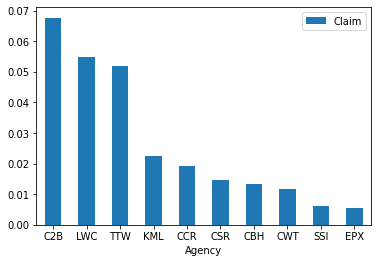

In [ ]:
ax = Claim_mean.plot.bar(x='Agency', y='Claim', rot=0)


**Agencies with the most number of net sales**


In [ ]:
netsales_mean = (df.groupby('Agency', as_index=False)['Net Sales'].mean()).nlargest(10,'Net Sales')
netsales_mean

,Agency,Net Sales
11,LWC,120.021442
0,ADM,97.697674
15,TTW,93.194805
2,C2B,81.687274
10,KML,57.329073
8,JWT,55.108514
6,CWT,53.973741
5,CSR,33.808824
7,EPX,33.473937
9,JZI,33.370798


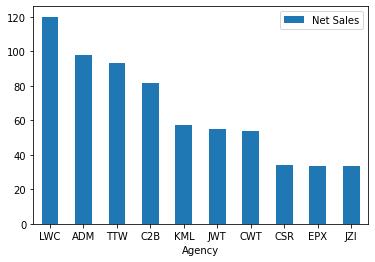

In [ ]:
ax1 = netsales_mean.plot.bar(x='Agency', y='Net Sales', rot=0)

Agency     
Claim              0    1
Agency Type              
Airlines       13199  473
Travel Agency  34599  265

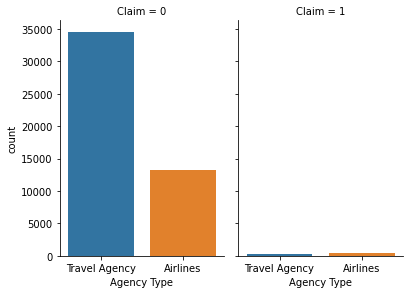

In [ ]:
plot2 = sns.catplot(x="Agency Type", col="Claim",data=df, kind="count",height=4, aspect=.7)
df.pivot_table(index=['Agency Type'],columns=['Claim'], values=['Agency'], aggfunc='count')

In [ ]:
df.pivot_table(index = ['Product Name'], values = ['Net Sales'], aggfunc = 'mean')


,Net Sales
Product Name,
1 way Comprehensive Plan,28.476154
2 way Comprehensive Plan,43.524684
24 Protect,24.324706
Annual Gold Plan,362.430000
Annual Silver Plan,227.285451
Annual Travel Protect Gold,249.142593
Annual Travel Protect Platinum,335.104444
Annual Travel Protect Silver,211.761765
Basic Plan,27.075577


**We can see from above Desity,Commision,Net sale,duration,clasim positivly skewd**

In [ ]:
#seprating numeric and catagorical data
df_num=df.select_dtypes(["int","float"])
df_cat=df.select_dtypes("object")

In [ ]:
df_num.head()

,Claim,Duration,Net Sales,Commision (in value),Age
1,0,85,69.0,0.00,36
2,0,11,19.8,11.88,75
3,0,16,20.0,0.00,32
4,0,10,15.0,0.00,29
5,0,64,49.5,29.70,36


**Skewness**

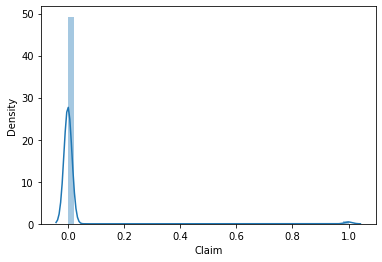

Claim 7.9235331542150345


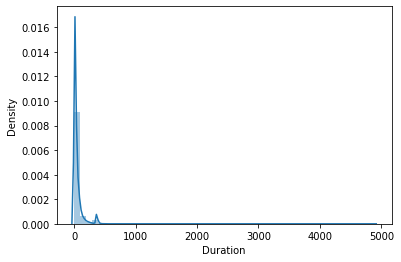

Duration 23.13355551269812


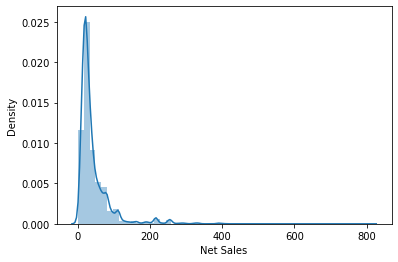

Net Sales 3.7486997052049746


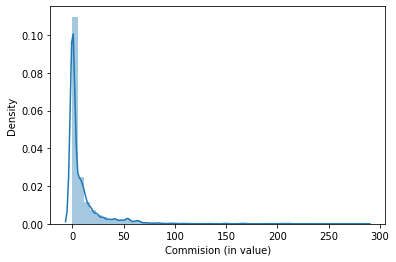

Commision (in value) 4.276732044098302


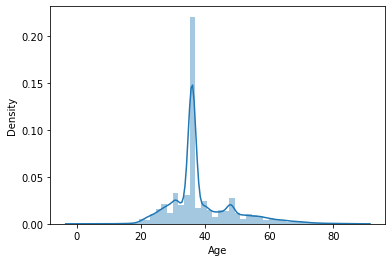

Age 1.2148443680304253


In [ ]:
from scipy.stats import skew

for col in df_num:
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()
  print(col, skew(df_num[col]))

In [ ]:
#store claim column in variable
df_numnew=df_num["Claim"]
df_numwitoutclaim=df_num[["Duration","Net Sales","Commision (in value)","Age"]]

In [ ]:
df_numwitoutclaim

,Duration,Net Sales,Commision (in value),Age
1,85,69.0,0.00,36
2,11,19.8,11.88,75
3,16,20.0,0.00,32
4,10,15.0,0.00,29
5,64,49.5,29.70,36
...,...,...,...,...
50548,11,99.0,59.40,50
50549,48,20.0,0.00,36
50550,24,28.0,10.64,48
50551,25,15.0,0.00,36


In [ ]:
df_numnew

1        0
2        0
3        0
4        0
5        0
        ..
50548    0
50549    0
50550    0
50551    0
50552    0
Name: Claim, Length: 48536, dtype: int64

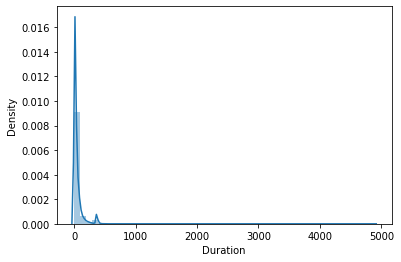

Duration 23.13355551269812


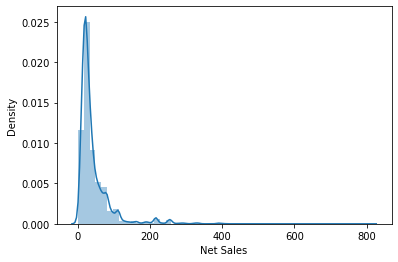

Net Sales 3.7486997052049746


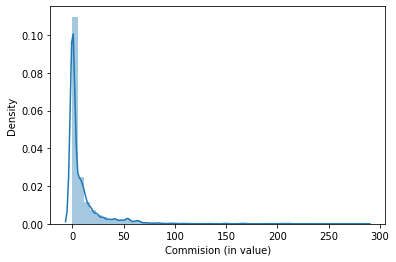

Commision (in value) 4.276732044098302


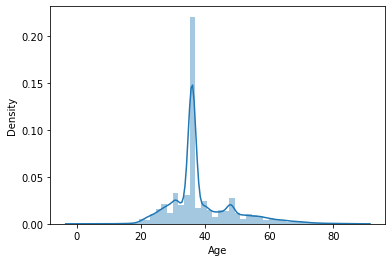

Age 1.2148443680304253


In [ ]:
#lets see skewness
for col in df_numwitoutclaim:
  plt.figure()
  sns.distplot(df_numwitoutclaim[col])
  plt.show()
  print(col, skew(df_numwitoutclaim[col]))

In [ ]:
#removing skewness
for col in df_numwitoutclaim:
  if skew(df_numwitoutclaim[col]) >= 0.5 or skew(df_numwitoutclaim[col]) <= -0.5:
    df_numwitoutclaim[col] = np.sqrt(df_numwitoutclaim[col])
    

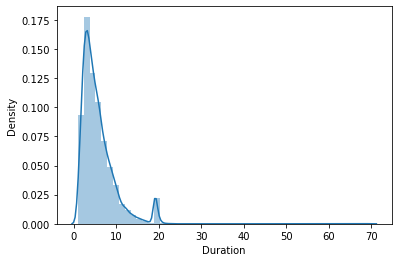

Duration 2.4681989896626795


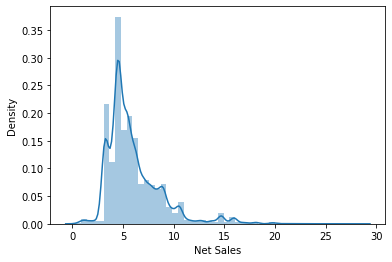

Net Sales 1.8479734387767213


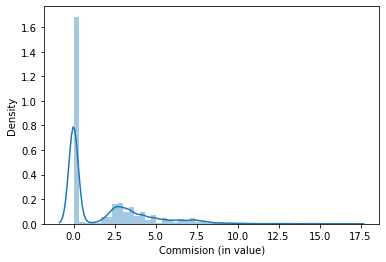

Commision (in value) 1.4209919803987445


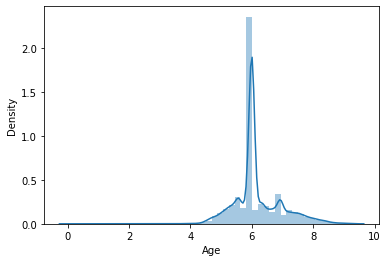

Age 0.6971452234312263


In [ ]:
for col in df_numwitoutclaim:
  plt.figure()
  sns.distplot(df_numwitoutclaim[col])
  plt.show()
  print(col, skew(df_numwitoutclaim[col]))

**Combine Data**

In [ ]:
df_num=pd.concat([df_numwitoutclaim,df_numnew],axis=1)

In [ ]:
df_num

,Duration,Net Sales,Commision (in value),Age,Claim
1,9.219544,8.306624,0.000000,6.000000,0
2,3.316625,4.449719,3.446738,8.660254,0
3,4.000000,4.472136,0.000000,5.656854,0
4,3.162278,3.872983,0.000000,5.385165,0
5,8.000000,7.035624,5.449771,6.000000,0
...,...,...,...,...,...
50548,3.316625,9.949874,7.707140,7.071068,0
50549,6.928203,4.472136,0.000000,6.000000,0
50550,4.898979,5.291503,3.261901,6.928203,0
50551,5.000000,3.872983,0.000000,6.000000,0


**Encoding of data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [ ]:
df_cat

,Agency,Agency Type,Distribution Channel,Product Name,Destination
1,7,1,1,10,79
2,6,1,1,16,56
3,7,1,1,1,38
4,7,1,1,10,47
5,6,1,1,16,88
...,...,...,...,...,...
50548,6,1,1,16,65
50549,7,1,1,0,38
50550,10,1,1,24,38
50551,7,1,1,10,7


In [ ]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [ ]:
df_new

,Duration,Net Sales,Commision (in value),Age,Claim,Agency,Agency Type,Distribution Channel,Product Name,Destination
1,9.219544,8.306624,0.000000,6.000000,0,7,1,1,10,79
2,3.316625,4.449719,3.446738,8.660254,0,6,1,1,16,56
3,4.000000,4.472136,0.000000,5.656854,0,7,1,1,1,38
4,3.162278,3.872983,0.000000,5.385165,0,7,1,1,10,47
5,8.000000,7.035624,5.449771,6.000000,0,6,1,1,16,88
...,...,...,...,...,...,...,...,...,...,...
50548,3.316625,9.949874,7.707140,7.071068,0,6,1,1,16,65
50549,6.928203,4.472136,0.000000,6.000000,0,7,1,1,0,38
50550,4.898979,5.291503,3.261901,6.928203,0,10,1,1,24,38
50551,5.000000,3.872983,0.000000,6.000000,0,7,1,1,10,7


**Ploting Data for multicolinearity**

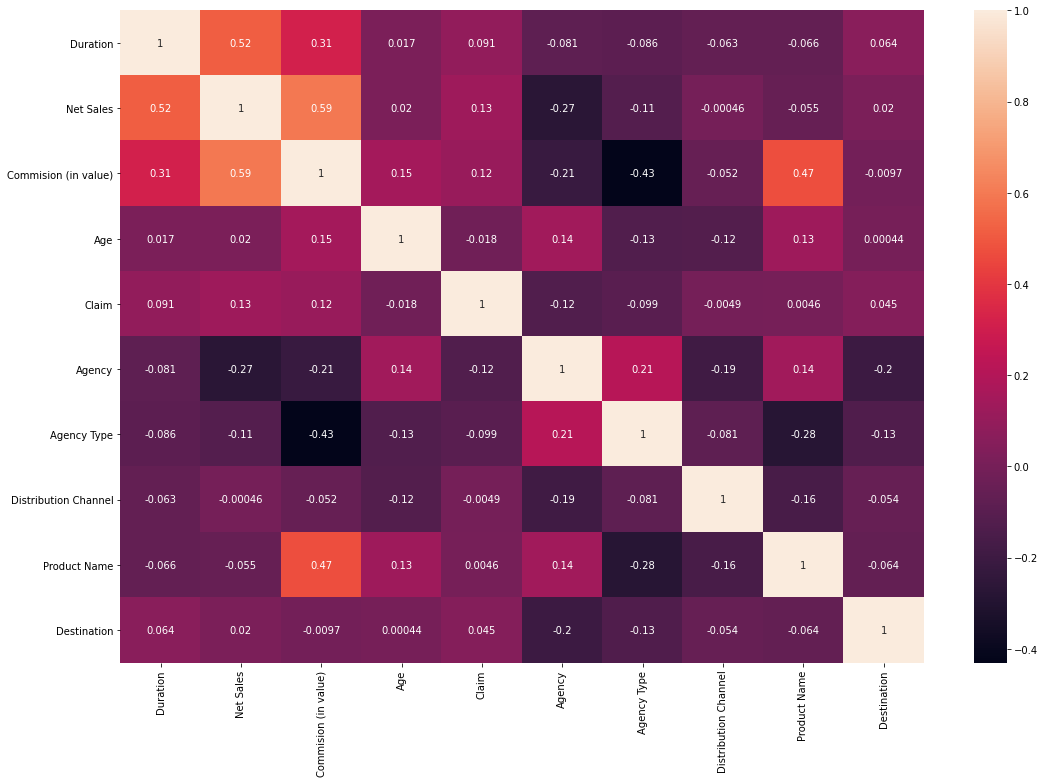

In [ ]:
#ploting heatmap
plt.show()
plt.figure(figsize=(18,12))
sns.heatmap(df_new.corr(),annot=True)

**as we can see from fig there is multicolineaarity in between Commision (in value) and agancy**

In [ ]:
#Dropping Commision (in value)	because it multicolinear with agancy
df_new.drop("Commision (in value)",axis=1,inplace=True)


**outliers Checking**

In [ ]:
#checking outliers in Net sales
q1 =np.quantile(df_num["Net Sales"],0.25)
q2=np.quantile(df_num["Net Sales"],0.50)
q3=np.quantile(df_num["Net Sales"],0.75)

In [ ]:
print(q1,q2,q3)

4.449719092257398 5.291502622129181 7.035623639735144


In [ ]:
IQR=q3-q1
IQR

2.585904547477746

In [ ]:
UW= q3+1.5*IQR
LW=q1-1.5*IQR
print(UW,LW)

10.914480460951763 0.5708622710407791


In [ ]:
df_num[df_num["Net Sales"] > UW]

,Duration,Net Sales,Commision (in value),Age,Claim
64,19.646883,14.696938,7.348469,7.280110,0
99,19.364917,19.731954,9.866104,5.099020,0
111,20.760539,16.501515,8.251061,5.830952,1
188,8.306624,12.922848,7.645260,7.416198,0
202,11.618950,16.046807,8.023715,9.000000,1
...,...,...,...,...,...
50437,3.464102,11.789826,5.894913,7.348469,0
50466,19.949937,18.248288,9.124144,6.403124,0
50493,19.157244,12.688578,6.344289,7.071068,0
50513,19.104973,15.901258,7.950472,5.567764,0


In [ ]:
#Duration
q1 =np.quantile(df_new["Duration"], 0.25)
q2=np.quantile(df_new["Duration"],0.50)
q3=np.quantile(df_new["Duration"],0.75)
print(q1,q2,q3)

3.0 4.69041575982343 7.211102550927978


In [ ]:
IQR=q3-q1
IQR

4.211102550927978

In [ ]:
UW= q3+1.5*IQR
LW=q1-1.5*IQR
print(UW,LW)

13.527756377319946 -3.316653826391967


In [ ]:
df_new[df_new["Duration"] > UW]

,Duration,Net Sales,Age,Claim,Agency,Agency Type,Distribution Channel,Product Name,Destination
18,15.491933,5.385165,5.099020,0,5,1,0,12,88
64,19.646883,14.696938,7.280110,0,2,0,1,4,79
99,19.364917,19.731954,5.099020,0,2,0,1,3,79
100,13.638182,6.557439,6.000000,0,7,1,1,1,17
111,20.760539,16.501515,5.830952,1,2,0,1,4,79
...,...,...,...,...,...,...,...,...,...
50493,19.157244,12.688578,7.071068,0,2,0,1,4,79
50513,19.104973,15.901258,5.567764,0,2,0,1,4,79
50525,16.309506,6.292853,6.403124,0,6,1,1,16,36
50536,19.416488,15.901258,7.874008,0,2,0,1,4,79


**Lets Check the ration of Claim and Non Claim data**

In [ ]:
LABELS = ["Non_claim","Clamin"]

Text(0, 0.5, 'Frequency')

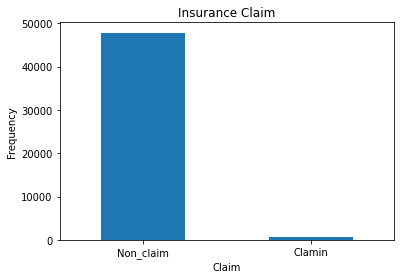

In [ ]:
count_classes = pd.value_counts(df_new['Claim'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Insurance Claim")

plt.xticks(range(2), LABELS)

plt.xlabel("Claim")

plt.ylabel("Frequency")

0    47798
1      738
Name: Claim, dtype: int64
---------------------------------------------------


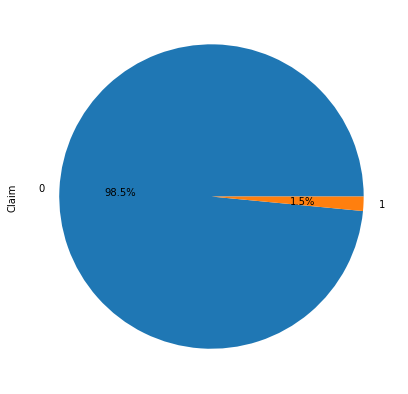

In [ ]:
print(df_new["Claim"].value_counts())
print("---------------------------------------------------")
plt.figure(figsize=(7,7))
df["Claim"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [ ]:
df_new=df_new.dropna()

**From above fig we can see there is huge inbalance data**


In [ ]:
X = df_new.drop("Claim",axis=1)
y = df_new["Claim"]

**Base line model**

**Filter Method -- Feature Selection**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
fe=SelectKBest(score_func=chi2,k=5)
X_train_fe=fe.fit_transform(X_train,y_train)
X_test_fe=fe.transform(X_test)

**StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [ ]:
X_train_ss=ss.fit_transform(X_train_fe)
X_test_ss=ss.transform(X_test_fe)


**Data imbalance Process**

**We are doing Oversampling because undersampling required huge amount of data and chances of lossing data is high**

**oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros=RandomOverSampler(random_state=1)
X_sample2 ,y_sample2=ros.fit_resample(X_train_ss,y_train)
pd.Series(y_sample2).value_counts()


1    33452
0    33452
dtype: int64

**Modeling Process**
**Model-1 LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr1=LogisticRegression()

In [ ]:
lr1.fit(X_sample2,y_sample2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score=cross_val_score(lr1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.74545998, 0.7423212 , 0.74105074, 0.74605784, 0.74185351])

In [ ]:
y_pred1=lr1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     14346
           1       0.05      0.67      0.09       215

    accuracy                           0.81     14561
   macro avg       0.52      0.74      0.49     14561
weighted avg       0.98      0.81      0.88     14561



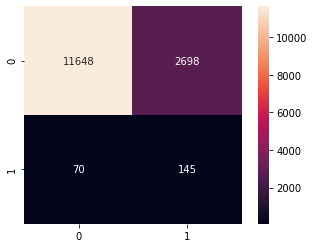

In [ ]:
mat1=confusion_matrix(y_test,y_pred1)
sns.heatmap(mat1,square=True,fmt="d",annot=True)

we can see our base model logistic regression give us acuracy of 81%

**roc_auc_score**

In [ ]:
scores=lr1.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[0.79548903 0.20451097]
 [0.79810906 0.20189094]
 [0.09097915 0.90902085]
 ...
 [0.45407006 0.54592994]
 [0.69544252 0.30455748]
 [0.19179342 0.80820658]]


In [ ]:
roc_auc_score(y_test,y_pred1)

0.743176122345099

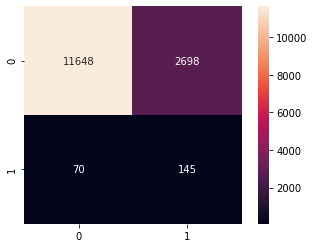

In [ ]:
mat1=confusion_matrix(y_test,y_pred1)
sns.heatmap(mat1,square=True,fmt="d",annot=True)

**Model 2= DecisionTreeClassifie**

In [ ]:
dt1=DecisionTreeClassifier( max_depth=10, min_samples_leaf=35)

In [ ]:
dt1.fit(X_sample2,y_sample2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
score=cross_val_score(dt1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.80935655, 0.81787609, 0.8121964 , 0.82848815, 0.81083707])

In [ ]:
y_pred3=dt1.predict(X_test_ss)


In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14346
           1       0.05      0.59      0.09       215

    accuracy                           0.83     14561
   macro avg       0.52      0.71      0.50     14561
weighted avg       0.98      0.83      0.90     14561



**From above fig we can see our model accuracy with gimi index is 83%**



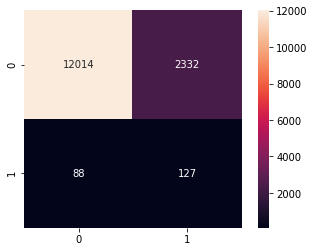

In [ ]:
mat3=confusion_matrix(y_test,y_pred3)
sns.heatmap(mat3,square=True,fmt="d",annot=True)

**roc_auc_score**

In [ ]:
scores=dt1.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[1.         0.        ]
 [1.         0.        ]
 [0.12284562 0.87715438]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.13620267 0.86379733]]


In [ ]:
roc_auc_score(y_test,y_pred3)

0.7140718261957794

**Decesion tree with (criterion="entropy")**

In [ ]:
dt3=DecisionTreeClassifier(criterion="entropy", max_depth=25, min_samples_leaf=30)

In [ ]:
dt3.fit(X_sample2,y_sample2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
score=cross_val_score(dt3,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.91248786, 0.90934908, 0.91293625, 0.9062103 , 0.90814649])

In [ ]:
y_pred5=dt3.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14346
           1       0.05      0.51      0.08       215

    accuracy                           0.84     14561
   macro avg       0.52      0.68      0.50     14561
weighted avg       0.98      0.84      0.90     14561



**From above fig we can see our model accuracy with  entropy is 84%**

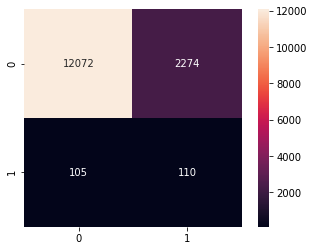

In [ ]:
mat5=confusion_matrix(y_test,y_pred5)
sns.heatmap(mat5,square=True,annot=True,fmt='d')

In [ ]:
scores=dt3.predict_proba(X_test_ss)
print(scores)

[[1.         0.        ]
 [1.         0.        ]
 [0.12418301 0.87581699]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.27586207 0.72413793]]


In [ ]:
y_test.value_counts()

0    14346
1      215
Name: Claim, dtype: int64

In [ ]:
roc_auc_score(y_test,y_pred5)

0.6765584118739848

**Model 3== RandomForestClassifier**

In [ ]:
rfc1=RandomForestClassifier(n_estimators=100,random_state=1)

In [ ]:
rfc1.fit(X_sample2,y_sample2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
score=cross_val_score(rfc1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.97967267, 0.98116733, 0.98251252, 0.98027053, 0.97944694])

In [ ]:
y_pred7=rfc1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     14346
           1       0.08      0.23      0.12       215

    accuracy                           0.95     14561
   macro avg       0.54      0.60      0.55     14561
weighted avg       0.97      0.95      0.96     14561



**From above fig we can see our Random model accuracy  is 95%**

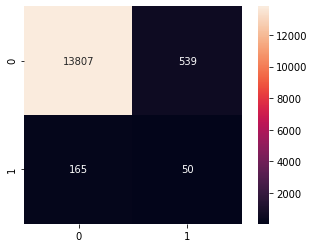

In [ ]:
mat7=confusion_matrix(y_test,y_pred7)
sns.heatmap(mat7,square=True,annot=True,fmt='d')



In [ ]:
scores=rfc1.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[1.         0.        ]
 [1.         0.        ]
 [0.09003336 0.90996664]
 ...
 [0.71394866 0.28605134]
 [1.         0.        ]
 [0.99       0.01      ]]


In [ ]:
roc_auc_score(y_test,y_pred7)

0.5974933455237502

**Model 4 Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb1=GradientBoostingClassifier()

In [ ]:
gb1.fit(X_sample2,y_sample2)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
score=cross_val_score(gb1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.7871609 , 0.78028548, 0.78596517, 0.78902922, 0.79005979])

In [ ]:
y_pred9=gb1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     14346
           1       0.05      0.67      0.10       215

    accuracy                           0.82     14561
   macro avg       0.52      0.74      0.50     14561
weighted avg       0.98      0.82      0.89     14561



**From above fig we cn see our model accuracy with gimi index is 82%**

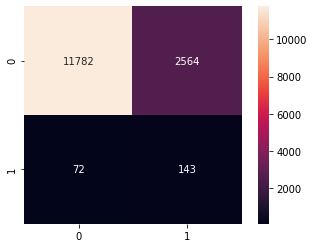

In [ ]:
mat9=confusion_matrix(y_test,y_pred9)
sns.heatmap(mat9,square=True,annot=True,fmt='d')


**roc_auc_score**

In [ ]:
scores=gb1.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[0.91943705 0.08056295]
 [0.83979365 0.16020635]
 [0.12315918 0.87684082]
 ...
 [0.41687725 0.58312275]
 [0.64941052 0.35058948]
 [0.13712463 0.86287537]]


In [ ]:
roc_auc_score(y_test,y_pred9)

0.7431952509248183

**Model 5= Adaboost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
aba1=AdaBoostClassifier(n_estimators=100)



In [ ]:
aba1.fit(X_sample2,y_sample2)



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [ ]:
score=cross_val_score(aba1,X_sample2,y_sample2,cv=5)
score


array([0.76915029, 0.76608624, 0.76339586, 0.76787983, 0.76674141])

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     14346
           1       0.05      0.67      0.09       215

    accuracy                           0.81     14561
   macro avg       0.52      0.74      0.49     14561
weighted avg       0.98      0.81      0.88     14561



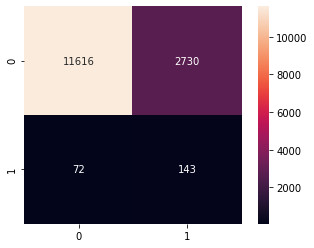

In [ ]:
y_pred11=aba1.predict(X_test_ss)
print(classification_report(y_test,y_pred11))
mat11=confusion_matrix(y_test,y_pred11)
sns.heatmap(mat11,square=True,annot=True,fmt="d")


**From above fig we cn see our model accuracy with gimi index is 82%**

**roc_auc_score**

In [ ]:
scores=aba1.predict_proba(X_test_ss)
scores=aba1.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[0.50735607 0.49264393]
 [0.50528433 0.49471567]
 [0.49455375 0.50544625]
 ...
 [0.50002849 0.49997151]
 [0.50190542 0.49809458]
 [0.49492806 0.50507194]]


In [ ]:
roc_auc_score(y_test,y_pred11)

0.7374096660928093

**Model 6 =SVC**

In [ ]:
lsvc1=LinearSVC(random_state=1)

In [ ]:
lsvc1.fit(X_sample2,y_sample2)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [ ]:
score=cross_val_score(lsvc1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.74164861, 0.74022868, 0.74022868, 0.74336746, 0.74050822])

In [ ]:
y_pred17=lsvc1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred17))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14346
           1       0.05      0.67      0.10       215

    accuracy                           0.83     14561
   macro avg       0.52      0.75      0.50     14561
weighted avg       0.98      0.83      0.89     14561



**From above fig we cn see our model accuracy with gimi index is 83%**

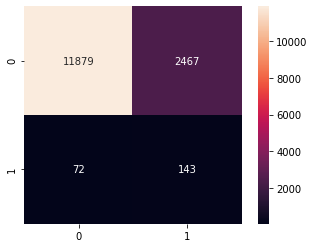

In [ ]:
mat17=confusion_matrix(y_test,y_pred17)
sns.heatmap(mat17,square=True,annot=True,fmt='d')

**Soft Margin**

In [ ]:
lsv1=LinearSVC(C=0.5,random_state=1)

In [ ]:
lsv1.fit(X_sample2,y_sample2)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [ ]:
score=cross_val_score(lsv1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.74164861, 0.74022868, 0.74022868, 0.74336746, 0.74050822])

In [ ]:
y_pred18=lsv1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred18))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14346
           1       0.05      0.67      0.10       215

    accuracy                           0.83     14561
   macro avg       0.52      0.75      0.50     14561
weighted avg       0.98      0.83      0.89     14561



**From above fig we cn see our model accuracy with gimi index is 83%**

In [ ]:
mat18=confusion_matrix(y_test,y_pred18)

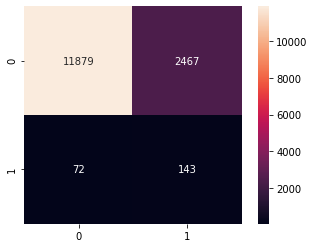

In [ ]:
sns.heatmap(mat18,square=True,annot=True,fmt='d')

**Ensembling**

Hard voting

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model_list1 = [("lr1",lr1),("dt1",dt1),("dt3",dt3),("rfc1",rfc1),("gb1",gb1),("aba1",aba1),("lsvc1",lsvc1)]

In [ ]:
vc1=VotingClassifier(estimators=model_list1)
vc1.fit(X_sample2,y_sample2)

VotingClassifier(estimators=[('lr1',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt1',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini...
                              AdaBoostCl

In [ ]:
vc3=VotingClassifier(estimators=model_list1)


In [ ]:
vc3.fit(X_sample2,y_sample2)
y_pred22=vc1.predict(X_test_ss)
print(classification_report(y_test,y_pred22))


              precision    recall  f1-score   support

           0       0.99      0.85      0.92     14346
           1       0.06      0.63      0.11       215

    accuracy                           0.85     14561
   macro avg       0.53      0.74      0.51     14561
weighted avg       0.98      0.85      0.91     14561



**From above fig we cn see our model accuracy with gimi index is 85%**

**soft voting**

In [ ]:
vc4=VotingClassifier(estimators=model_list1,voting="soft")

In [ ]:
vc4.fit(X_sample2,y_sample2)
y_pred23=vc1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred23))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92     14346
           1       0.06      0.63      0.11       215

    accuracy                           0.85     14561
   macro avg       0.53      0.74      0.51     14561
weighted avg       0.98      0.85      0.91     14561



**From above fig we cn see our model accuracy with gimi index is 85%**

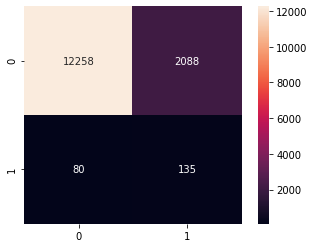

In [ ]:
mat23=confusion_matrix(y_test,y_pred23)
sns.heatmap(mat23,square=True,annot=True,fmt='d')

**ConclusionIn**

this project, we have used different ways of addressing the task with unbalanced data.Like Supervisedlearning LinearSVC, Adaboost, GradientBoosting ,DecisionTreeClassifier,Logistic Regression and RandomForest.As per their's result we conclude that Random forest is the best algorithm model since it's giving highaccuracy than other's. The highest accuracy is 95%